###Problem Statement

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1. Measure prediction score using default n_estimators (10)  
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

###Solution

Loading the Data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

Exploring the Data

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.shape

(150, 5)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

Training the Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
model.score(X_test,y_test)

0.9333333333333333

In [10]:
for i in [10,15,20,25,30,35,40,45,50]:
  model = RandomForestClassifier(n_estimators=i)
  model.fit(X_train, y_train)
  print(model.score(X_test,y_test))

0.9
0.9
0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333


We can see that the accuracy is maximum for 20 decision trees.

In [12]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

Confusion Matrix

In [13]:
y_predicted = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  9]])

Text(95.72222222222221, 0.5, 'Truth')

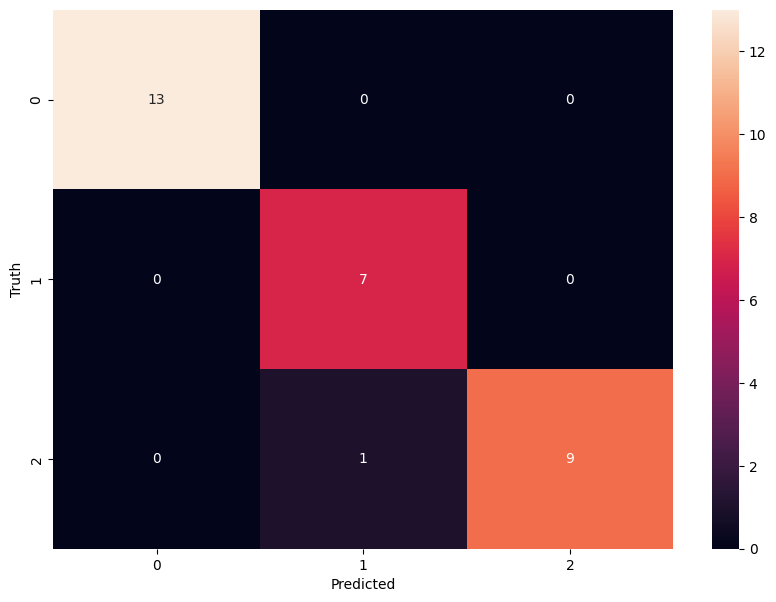

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Thus we have successfully implemented the random forest algorithm for the iris dataset and achieved an accuracy of 96.6%